In [1]:
pip install pandas mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/4c/43/2fc7f76c8891aef148901f1ba3dee65c1cbac00a85ae5ee0dabc2b861256/mlxtend-0.23.4-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.3.1 from https://files.pythonhosted.org/packages/25/92/ee1d7a00bb6b8c55755d4984fd82608603a3cc59959245068ce32e7fb808/scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/4b/2c/ffbf7a134b9ab11a67b0cf0726453cedd9c5043a4fe7a35d1cefa9a1bcfb/threadpoolctl-3.5.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 9.8 MB/s eta 0:00:00:00:0100:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: threadpoolctl
    Found 

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Step 1: Definining the path to the dataset in the Downloads folder
file_path = '/Users/vedshukla/Library/Mobile Documents/com~apple~CloudDocs/Mobile_user/user_behavior_dataset.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [16]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [17]:
# Renaming columns to remove spaces and make them shorter
df.columns = [
    'user_id', 
    'device_model', 
    'os', 
    'app_usage_time', 
    'screen_on_time', 
    'battery_drain', 
    'num_apps_installed', 
    'data_usage', 
    'age', 
    'gender', 
    'user_behavior_class'
]

# Dropping the 'user_id' column as it's not needed for clustering
df = df.drop(columns=['user_id'])

In [18]:
df

,device_model,os,app_usage_time,screen_on_time,battery_drain,num_apps_installed,data_usage,age,gender,user_behavior_class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [19]:
# Checking for any remaining missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
device_model           0
os                     0
app_usage_time         0
screen_on_time         0
battery_drain          0
num_apps_installed     0
data_usage             0
age                    0
gender                 0
user_behavior_class    0
dtype: int64


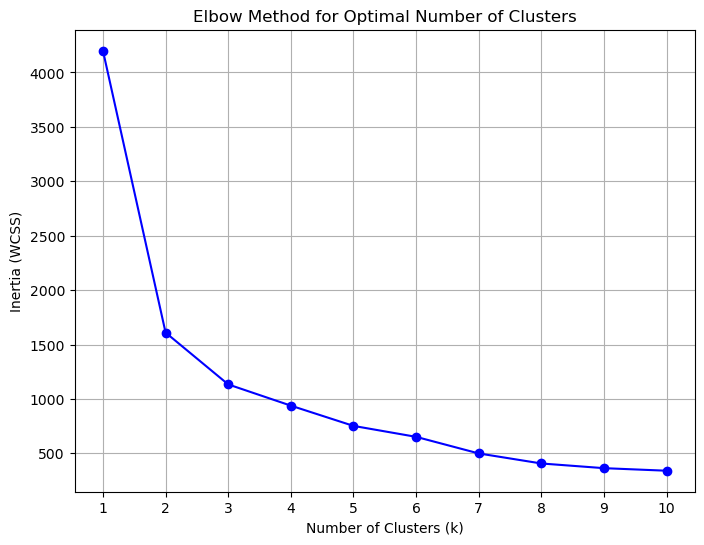

k = 1, Inertia (SSE) = 4200.000000000001
k = 2, Inertia (SSE) = 1609.519089171413
k = 3, Inertia (SSE) = 1133.176272891874
k = 4, Inertia (SSE) = 938.1580671199497
k = 5, Inertia (SSE) = 751.970937811881
k = 6, Inertia (SSE) = 651.3709883914669
k = 7, Inertia (SSE) = 498.8161920333753
k = 8, Inertia (SSE) = 406.5556529667247
k = 9, Inertia (SSE) = 363.4887706682661
k = 10, Inertia (SSE) = 339.98405512369254


In [20]:
# Step 1: Select only numerical columns
numerical_columns = ['app_usage_time', 'screen_on_time', 'battery_drain', 'num_apps_installed', 
                     'data_usage', 'age']  # Adjust as needed
df_numerical = df[numerical_columns]

# Step 2: Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Step 3: Calculate Inertia (SSE) for different values of k (1 to 10 in this case)
inertia_values = []  # List to store inertia values

# Try different k values and fit the model
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)  # Inertia (SSE) is stored here

# Step 4: Plot the Elbow Curve (Inertia vs. Number of Clusters)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

# Optional: Print the Inertia Values for each k
for k, inertia in zip(range(1, 11), inertia_values):
    print(f'k = {k}, Inertia (SSE) = {inertia}')

/Users/vedshukla/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


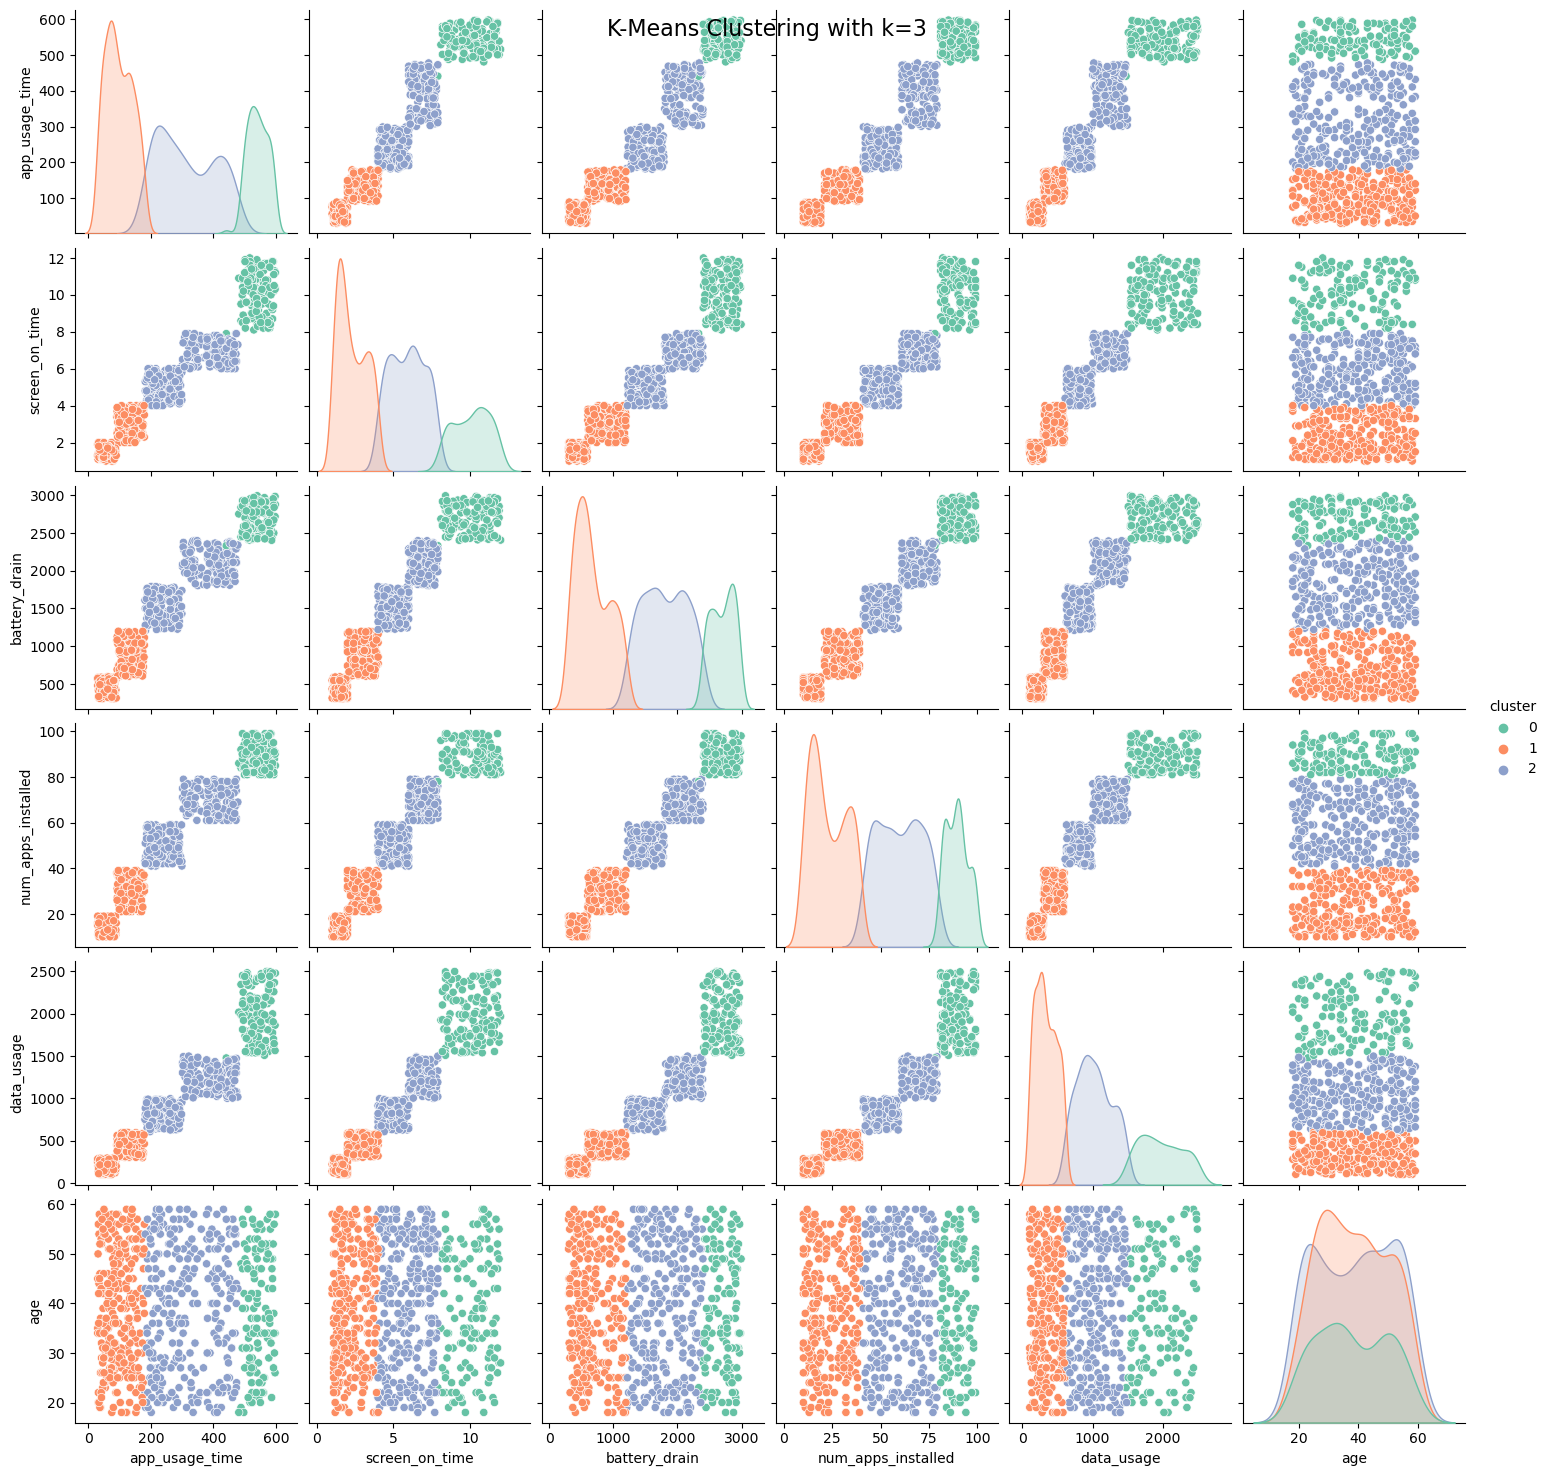

Cluster Centers (Centroids):
   app_usage_time  screen_on_time  battery_drain  num_apps_installed  \
0        1.522297        1.573780       1.433219            1.429444   
1       -0.980729       -0.972226      -1.036175           -1.030237   
2        0.242031        0.208398       0.341105            0.336985   

   data_usage       age  
0    1.627196 -0.034751  
1   -0.935096 -0.003889  
2    0.145093  0.020846  

Cluster Sizes:
cluster
1    282
2    281
0    137
Name: count, dtype: int64

Basic Statistics for Each Cluster:
cluster                             0            1            2
app_usage_time     count   137.000000   282.000000   281.000000
                   mean    540.686131    97.468085   313.985765
                   std      32.186897    41.955586    91.369813
                   min     441.000000    30.000000   181.000000
                   25%     516.000000    64.000000   228.000000
                   50%     540.000000    93.500000   298.000000
                 

In [21]:
# Optional: Apply K-Means with the chosen number of clusters (k = optimal)
optimal_k = 3  # Example: suppose 3 is the optimal k based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(df_scaled)

# Step 6: Visualize the clustering result (optional)
# For example, using a pairplot or 3D visualization as discussed before
sns.pairplot(df, vars=numerical_columns, hue="cluster", palette="Set2")
plt.suptitle(f'K-Means Clustering with k={optimal_k}', size=16)
plt.show()

# Step 7: Print the cluster summary
# 7.1: Print the cluster centers (centroids)
print("Cluster Centers (Centroids):")
print(pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns))

# 7.2: Print the size of each cluster (number of points in each cluster)
print("\nCluster Sizes:")
cluster_sizes = df['cluster'].value_counts()
print(cluster_sizes)

# 7.3: Print basic statistics (mean, median, etc.) for each cluster
print("\nBasic Statistics for Each Cluster:")
cluster_stats = df.groupby('cluster')[numerical_columns].describe().T
print(cluster_stats)

# 7.4: Optionally, print the first few rows with cluster labels
print("\nFirst Few Rows with Cluster Labels:")
print(df[['device_model', 'gender', 'app_usage_time', 'cluster']].head())

In [26]:
# Discretize continuous variables into bins (you can adjust the bins based on your domain knowledge)
df['app_usage_time_binned'] = pd.cut(df['app_usage_time'], bins=[0, 180, 360, 540, 600], labels=[1, 2, 3, 4])
df['battery_drain_binned'] = pd.cut(df['battery_drain'], bins=[0, 800, 1600, 2400], labels=[1, 2, 3])
df['screen_on_time_binned'] = pd.cut(df['screen_on_time'], bins=[0, 2, 5, 10, 12], labels=[1, 2, 3, 4])

# Convert cluster labels to a separate column
df['cluster_label'] = df['cluster'].astype(str)

# Create the transaction dataframe with binary encoding
transaction_df = pd.DataFrame()

# Encode features as binary columns
for col in ['app_usage_time_binned', 'battery_drain_binned', 'screen_on_time_binned', 'cluster_label']:
    transaction_df = pd.concat([transaction_df, pd.get_dummies(df[col], prefix=col)], axis=1)

# Check the first few rows of the transaction dataframe
print(transaction_df.head())

   app_usage_time_binned_1  app_usage_time_binned_2  app_usage_time_binned_3  \
0                    False                    False                     True   
1                    False                     True                    False   
2                     True                    False                    False   
3                    False                     True                    False   
4                    False                     True                    False   

   app_usage_time_binned_4  battery_drain_binned_1  battery_drain_binned_2  \
0                    False                   False                   False   
1                    False                   False                    True   
2                    False                    True                   False   
3                    False                   False                   False   
4                    False                   False                    True   

   battery_drain_binned_3  screen_on_time_binned_1

In [27]:
# Apply Apriori algorithm to find frequent itemsets (min_support is a threshold)
frequent_itemsets = apriori(transaction_df, min_support=0.05, use_colnames=True)

In [28]:
frequent_itemsets

,support,itemsets
0,0.402857,(app_usage_time_binned_1)
1,0.264286,(app_usage_time_binned_2)
2,0.238571,(app_usage_time_binned_3)
3,0.094286,(app_usage_time_binned_4)
4,0.274286,(battery_drain_binned_1)
...,...,...
71,0.121429,"(cluster_label_1, battery_drain_binned_2, scre..."
72,0.071429,"(cluster_label_2, screen_on_time_binned_2, app..."
73,0.054286,"(cluster_label_2, screen_on_time_binned_3, app..."
74,0.095714,"(cluster_label_2, screen_on_time_binned_3, app..."


In [32]:
# For the 'num_itemsets', calculate the length of the frequent itemsets DataFrame
num_itemsets = len(frequent_itemsets)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0, num_itemsets=num_itemsets)

# Display the generated association rules
print("Generated Association Rules:")
print(rules.head())

Generated Association Rules:
                 antecedents                consequents  antecedent support  \
0  (app_usage_time_binned_1)   (battery_drain_binned_1)            0.402857   
1   (battery_drain_binned_1)  (app_usage_time_binned_1)            0.274286   
2   (battery_drain_binned_2)  (app_usage_time_binned_1)            0.254286   
3  (app_usage_time_binned_1)   (battery_drain_binned_2)            0.402857   
4  (screen_on_time_binned_1)  (app_usage_time_binned_1)            0.204286   

   consequent support   support  confidence     lift  representativity  \
0            0.274286  0.274286    0.680851  2.48227               1.0   
1            0.402857  0.274286    1.000000  2.48227               1.0   
2            0.402857  0.128571    0.505618  1.25508               1.0   
3            0.254286  0.128571    0.319149  1.25508               1.0   
4            0.402857  0.204286    1.000000  2.48227               1.0   

   leverage  conviction  zhangs_metric   jaccard  c

In [34]:
# Sort rules by lift, confidence, and support
top_rules = rules.sort_values(by=["lift", "confidence", "support"], ascending=False).head(5)

# Display the top 5 rules
print(top_rules[["antecedents", "consequents", "support", "confidence", "lift"]])

                                           antecedents  \
157         (cluster_label_0, app_usage_time_binned_3)   
160                          (screen_on_time_binned_4)   
55                           (screen_on_time_binned_4)   
31                           (app_usage_time_binned_4)   
158  (screen_on_time_binned_4, app_usage_time_binne...   

                                    consequents   support  confidence  \
157                   (screen_on_time_binned_4)  0.060000    0.591549   
160  (cluster_label_0, app_usage_time_binned_3)  0.060000    0.560000   
55                            (cluster_label_0)  0.107143    1.000000   
31                            (cluster_label_0)  0.094286    1.000000   
158                           (cluster_label_0)  0.060000    1.000000   

         lift  
157  5.521127  
160  5.521127  
55   5.109489  
31   5.109489  
158  5.109489  
